<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2022/blob/main/Classification/Diabetic3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [288]:
# Importing the libraries
import math
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt


In [289]:
# !apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
# !apt install cm-super

In [290]:
# plt.rcParams['text.usetex'] = True

**Reading the data**

In [291]:
# Importing the datasets
df     = pd.read_csv('diabetes.csv')

**Display the data**

In [292]:
df.shape

(768, 9)

**Display sample data**

In [293]:
df.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Pedigree Fun,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [294]:
# df.sample(n = 10)

In [295]:
# Drop the first column
# df = df.drop('Outcome', axis = 1)

In [296]:
# Drop rows with any NaN values
df = df.dropna()

In [297]:
# df = df.drop(['AHI','Outcome'], axis = 1)

In [298]:
df.sample(n = 10)

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Pedigree Fun,Age,Outcome
656,2,101,58,35,90,21.8,0.155,22,0
586,8,143,66,0,0,34.9,0.129,41,1
397,0,131,66,40,0,34.3,0.196,22,1
196,1,105,58,0,0,24.3,0.187,21,0
246,10,122,68,0,0,31.2,0.258,41,0
450,1,82,64,13,95,21.2,0.415,23,0
727,0,141,84,26,0,32.4,0.433,22,0
316,3,99,80,11,64,19.3,0.284,30,0
496,5,110,68,0,0,26.0,0.292,30,0
145,0,102,75,23,0,0.0,0.572,21,0


In [299]:
ones_count = df['Outcome'].value_counts()[1]
print(ones_count)

268


In [300]:
zeros_count = (df['Outcome'] == 0).sum()
print(zeros_count)

500


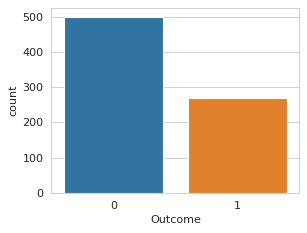

In [301]:
# Create a figure with size 8x6 inches, 80 dots per inch resolution
fig = plt.figure(figsize=(4,3), dpi=80)
# Calculate the number of classes in the class
sns.countplot(data=df, x='Outcome')
plt.savefig('classes.png')

In [302]:
# from matplotlib import pyplot as plt

# fig, axes = plt.subplots(1,3,figsize=(8,3),sharey=True)
# sns.countplot(ax=axes[0],data=df, x='Outcome')
# sns.countplot(ax=axes[1],data=df, x='Sex')
# sns.countplot(ax=axes[2],data=df, x='BMI')
# plt.savefig('Statistics.png')




```
# This is formatted as code
```

**Correlation between different variables**

In [303]:
# Correlation heatmap with mask for upper traingle
# Correlation between different variables
corr = df.corr()

# get absolute correlation coefficients and sort in descending order
abs_corr = corr.abs().sort_values(by='Outcome', ascending=False)

# display the rank of features based on correlation coefficients
rank = abs_corr['Outcome'].rank(ascending=False).astype(int)
print('Rank of features based on correlation coefficients:\n', rank)

Rank of features based on correlation coefficients:
 Outcome           1
Glucose           2
BMI               3
Age               4
Pregnancies       5
Pedigree Fun      6
Insulin           7
Skin Thickness    8
Blood Pressure    9
Name: Outcome, dtype: int64


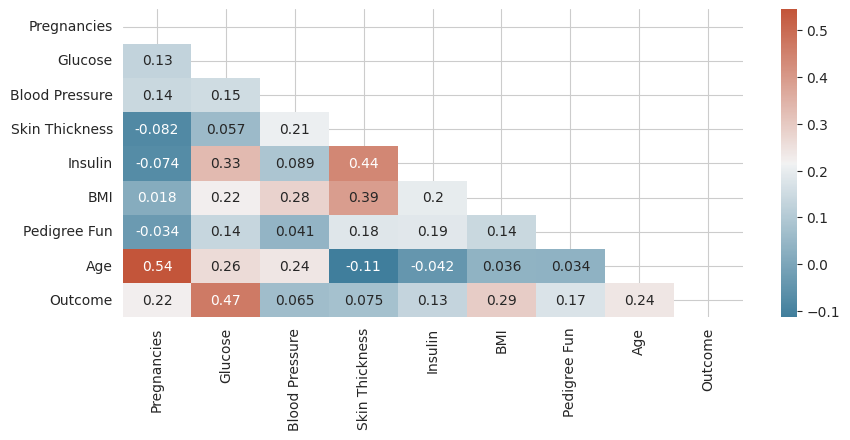

In [304]:
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(10, 4))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.savefig('Heatmap.png')

**Oversampling**

In [305]:
from imblearn.over_sampling import RandomOverSampler

# Assuming your DataFrame is called `df` and the target variable is called `Prediction`
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Instantiate a RandomOverSampler object
oversampler = RandomOverSampler()

# Fit and transform the data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Combine the resampled X and y into a new DataFrame
df = pd.concat([X_resampled, y_resampled], axis=1)


In [306]:
df.shape

(1000, 9)

In [307]:
# # example of random undersampling to balance the class distribution
# from collections import Counter
# from sklearn.datasets import make_classification
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

# # The class can be used just like the RandomOverSampler class in the
# # previous section, except the strategies impact the majority class
# # instead of the minority class. For example, setting the sampling_strategy
# # argument to “majority” will oversample the majority class determined
# # by the class with the largest number of examples.

# # define Oversample strategy
# oversample = RandomOverSampler(sampling_strategy='not majority')
# x_over, y_over = oversample.fit_resample(x_data,y_data)

In [308]:
# y_over.value_counts().plot.pie(autopct='%.2f')

In [309]:
# x_over.shape

In [310]:
# X

**Preparing data for machine learning classifier**



In [311]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['Outcome'], axis=1),
                                                    df['Outcome'],
                                                    test_size=0.25,
                                                    random_state=42)

**Feature selection**

In [312]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

#======================================
# Apply feature selection using SelectKBest and F-test
# We apply feature selection using SelectKBest and F-test, which selects the top 5 features based on their importance.
selector  = SelectKBest(f_classif, k=5)
#======================================

x_train    = selector.fit_transform(X_train, Y_train)
x_test     = selector.transform(X_test)

y_train = Y_train
y_test  = Y_test

In [313]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Get the selected feature names
selected_feature_names = X_train.columns[selector.get_support()]

print(selected_feature_names)

Index(['Pregnancies', 'Glucose', 'BMI', 'Pedigree Fun', 'Age'], dtype='object')


In [314]:
# sns.pairplot(df, vars=['Weight (lb)', 'BAN', 'AHI','Outcome'])
# plt.savefig('Correction with Outcome.png')

In [315]:
X_train[selected_feature_names].head()

,Pregnancies,Glucose,BMI,Pedigree Fun,Age
82,7,83,29.3,0.767,36
991,13,152,26.8,0.731,43
789,3,176,33.3,1.154,52
894,2,146,28.0,0.337,29
398,3,82,21.1,0.389,25


**Scaling the data**

In [316]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

In [317]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate

def calculate_confusion(clf_name, y_train, y_pred_train, y_test, y_pred_test):

    # Calculate accuracy, precision, recall, and F1 score for training and testing sets
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    train_prec = precision_score(y_train, y_pred_train)
    test_prec = precision_score(y_test, y_pred_test)
    train_rec = recall_score(y_train, y_pred_train)
    test_rec = recall_score(y_test, y_pred_test)
    train_f1 = f1_score(y_train, y_pred_train)
    test_f1 = f1_score(y_test, y_pred_test)

    # Calculate the confusion matrix for training and testing sets
    train_cm = confusion_matrix(y_train, y_pred_train)
    test_cm = confusion_matrix(y_test, y_pred_test)

    # Create a 1x2 figure with the confusion matrix on the left and evaluation metrics on the right
    fig, axs = plt.subplots(1, 2, figsize=(6,2),sharey=True)

    # Plot the confusion matrix for training set
    sns.heatmap(train_cm, annot=True, cmap='YlGnBu', fmt='g', ax=axs[0], annot_kws={"size": 12}, cbar_kws={"shrink": 0.7})
    axs[0].set_title('Training Set',fontsize=10)
    axs[0].set_xlabel('Predicted Labels',fontsize=10)
    axs[0].set_ylabel('True Labels',fontsize=10)

    # Plot the confusion matrix for testing set
    sns.heatmap(test_cm, annot=True, cmap='YlGnBu', fmt='g', ax=axs[1], annot_kws={"size": 12}, cbar_kws={"shrink": 0.7})
    axs[1].set_title('Testing Set',fontsize=10)
    axs[1].set_xlabel('Predicted Labels',fontsize=10)
    axs[1].set_ylabel('True Labels',fontsize=10)

    # Add a main title to the figure
    # fig.suptitle(f'Confusion matrix using {clf_name} ', fontsize=12, y=1.01, fontname='Times')
    # fig.suptitle(f'Confusion matrix using {clf_name} ', fontsize=12, y=1.09)
    plt.savefig(clf_name + ".png")
    # Show the plot
    plt.show()

    # Define the performance metrics for training and testing cases
    train_metrics = ["Train Accuracy", "Train Precision", "Train Recall", "Train F1"]
    test_metrics = ["Test Accuracy", "Test Precision", "Test Recall", "Test F1"]

    # Create a list of lists containing the metrics
    table = [train_metrics + test_metrics,
         [train_acc, train_prec, train_rec, train_f1, test_acc, test_prec, test_rec, test_f1]]

    # Print the table
    print('-----Results for',clf_name,'----------------------')
    print(tabulate(table, headers='firstrow'))

# Logistic Regression

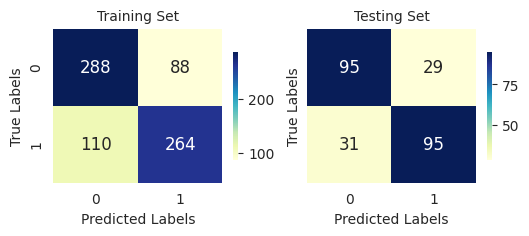

-----Results for LR ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
           0.736               0.75        0.705882    0.727273             0.76          0.766129       0.753968       0.76


In [318]:
#set up plotting area
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# We now prepare our selected models
models  = []
results = []
names   = []
scoring = 'accuracy'
names   = ['LRC', 'SVC', 'GBC', 'GNB', 'RFC', 'KNC']

#LogisticRegression ####################################
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', max_iter=20)
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)
calculate_confusion("LR",y_train, y_pred_train, y_test, y_pred_test)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(lr, x_test, y_test)
results.append(cv_results)

In [319]:
# Compute False postive rate, and True positive rate
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_train, y_pred_train)
# Calculate Area under the curve to display on the plot
auc1 = metrics.roc_auc_score(y_train,lr.predict(x_train))

# Support Vector Machine

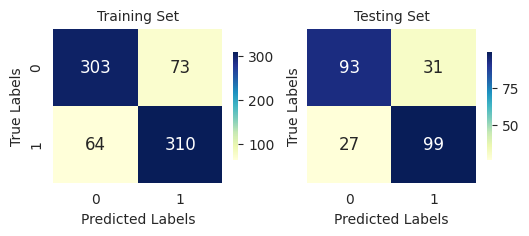

-----Results for SVM ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.817333           0.809399        0.828877    0.819022            0.768          0.761538       0.785714   0.773438


In [320]:
#SVM ####################################
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, probability=True)
svm.fit(x_train, y_train)
y_pred_train = svm.predict(x_train)
y_pred_test  = svm.predict(x_test)
calculate_confusion("SVM",y_train, y_pred_train, y_test, y_pred_test)
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(svm, x_test, y_test)
results.append(cv_results)

In [321]:
# Compute False postive rate, and True positive rate
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, y_pred_train)
# Calculate Area under the curve to display on the plot
auc2 = metrics.roc_auc_score(y_train,svm.predict(x_train))

# Gradient Boosting Classifier

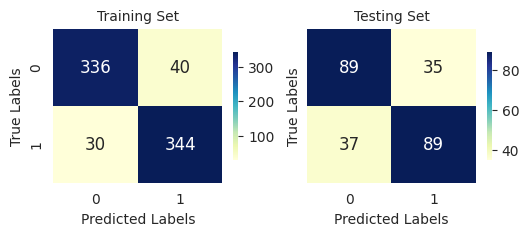

-----Results for GBC ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.906667           0.895833        0.919786    0.907652            0.712          0.717742       0.706349      0.712


In [322]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

GBC = GradientBoostingClassifier(random_state=1)
GBC.fit(x_train, y_train)
y_pred_train = GBC.predict(x_train)
y_pred_test  = GBC.predict(x_test)

calculate_confusion("GBC",y_train, y_pred_train, y_test, y_pred_test)
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GBC, x_test, y_test)
results.append(cv_results)

In [323]:
# Compute False postive rate, and True positive rate
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_train, y_pred_train)
# Calculate Area under the curve to display on the plot
auc3 = metrics.roc_auc_score(y_train,y_pred_train)

# GaussianNB

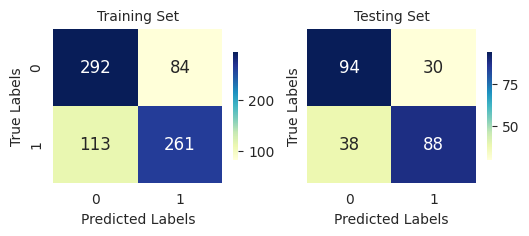

-----Results for GNB ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.737333           0.756522        0.697861    0.726008            0.728          0.745763       0.698413   0.721311


In [324]:
#GaussianNB
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB(priors=None, var_smoothing=1e-9)
GNB.fit(x_train, y_train)

# Adjust classification threshold to 0.3
y_pred_train = GNB.predict(x_train)
# y_pred_train = (y_pred_train >= 0.1).astype(int)

y_pred_test  = GNB.predict(x_test)
# y_pred_test = (y_pred_test >= 0.1).astype(int)

calculate_confusion("GNB",y_train, y_pred_train, y_test, y_pred_test)
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GNB, x_test, y_test)
results.append(cv_results)

In [325]:
# Compute False postive rate, and True positive rate
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_train, y_pred_train)
# Calculate Area under the curve to display on the plot
auc4 = metrics.roc_auc_score(y_train,GNB.predict(x_train))

# KNeighborsClassifier

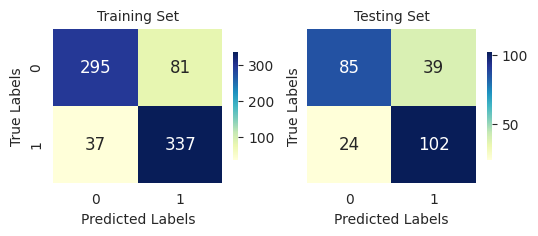

-----Results for KNC ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.842667            0.80622         0.90107     0.85101            0.748          0.723404       0.809524   0.764045


In [326]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(x_train, y_train)
y_pred_train = KNC.predict(x_train)
y_pred_test  = KNC.predict(x_test)
calculate_confusion("KNC",y_train, y_pred_train, y_test, y_pred_test)
fpr5, tpr5, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(KNC, x_test, y_test)
results.append(cv_results)

In [327]:
# Compute False postive rate, and True positive rate
fpr5, tpr5, thresholds5 = metrics.roc_curve(y_train, y_pred_train)
# Calculate Area under the curve to display on the plot
auc5 = metrics.roc_auc_score(y_train,KNC.predict(x_train))

# Decision Tree

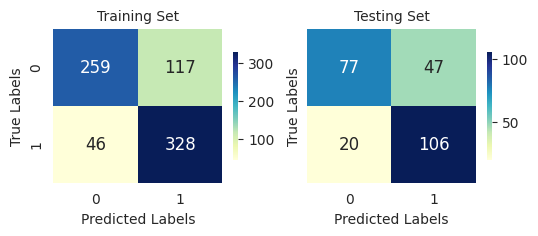

-----Results for DT ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.782667           0.737079        0.877005    0.800977            0.732           0.69281        0.84127   0.759857


In [328]:
# Decision Tree Model
from sklearn import tree
DT = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,ccp_alpha=0.01)
DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
y_pred_test  = DT.predict(x_test)
calculate_confusion("DT",y_train, y_pred_train, y_test, y_pred_test)
fpr6, tpr6, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(DT, x_test, y_test)
results.append(cv_results)

In [329]:
# Compute False postive rate, and True positive rate
fpr6, tpr6, thresholds6 = metrics.roc_curve(y_train, DT.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc6 = metrics.roc_auc_score(y_train,y_pred_train)

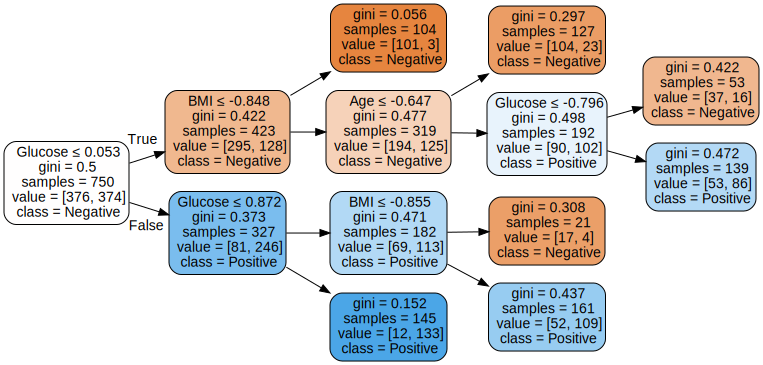

In [330]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['Outcome'], axis=1),
                                                    df['Outcome'],
                                                    test_size=0.25,
                                                    random_state=42)

# Train the decision tree on the scaled data
DT = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,ccp_alpha=0.01)
DT.fit(x_train, y_train)

# Export the tree as a Graphviz dot file
dot_data = export_graphviz(DT, out_file=None, feature_names=selected_feature_names,
                           class_names=['Negative', 'Positive'], filled=True, rounded=True,
                           special_characters=True, rotate=True)

# Create a graph from the dot file
graph = graphviz.Source(dot_data)

# Render the graph as a PNG image
graph.format = 'png'
graph.render('decision tree', view=False)

# Display the graph
graph


In [331]:
# Plotting the Decision Tree diagram
# from sklearn.tree import plot_tree
# plt.figure(figsize=(4,4))
# plot_tree(DT, filled=True, feature_names=selected_feature_names, class_names='Outcome')
# plt.show()

# Random Forest Classifier

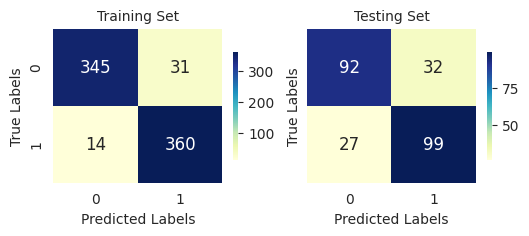

-----Results for RFC ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
            0.94           0.920716        0.962567    0.941176            0.764          0.755725       0.785714   0.770428


In [332]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier with max_features set to 0.5
RFC = RandomForestClassifier(n_estimators=100, max_depth=7, criterion='gini', max_features=1.0, random_state=42)
RFC.fit(x_train, y_train)
y_pred_train = RFC.predict(x_train)
y_pred_test  = RFC.predict(x_test)
calculate_confusion("RFC",y_train, y_pred_train, y_test, y_pred_test)
fpr7, tpr7, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(RFC, x_test, y_test)
results.append(cv_results)

In [333]:
# Compute False postive rate, and True positive rate
fpr7, tpr7, thresholds7 = metrics.roc_curve(y_train, RFC.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc7 = metrics.roc_auc_score(y_train,y_pred_train)

In [334]:
# Create a Random Forest classifier object
RFC= RandomForestClassifier(n_estimators=10, ccp_alpha=0.01)

# Train the model on the data
RFC.fit(X, y)

# Print the trained decision trees
for i, tree in enumerate(RFC.estimators_):
    print(f"Tree {i}:")
    print(tree.tree_.max_depth)  # print the depth of each tree

Tree 0:
3
Tree 1:
6
Tree 2:
4
Tree 3:
2
Tree 4:
5
Tree 5:
5
Tree 6:
5
Tree 7:
5
Tree 8:
3
Tree 9:
5


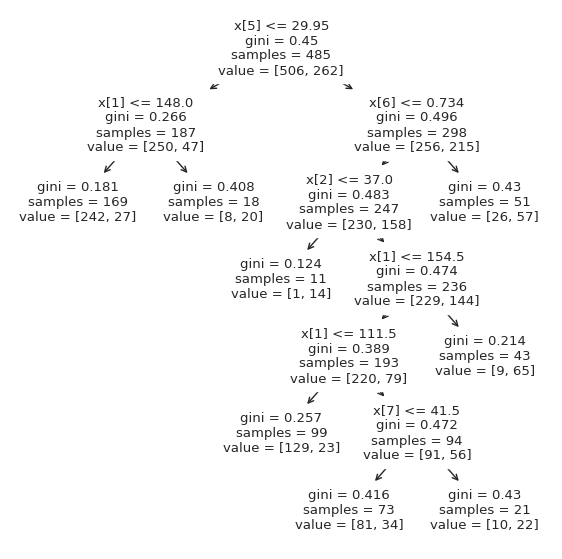

In [335]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Choose the best tree from the forest based on mean decrease impurity
best_tree_index = RFC.feature_importances_.argmax()

# Plot the best tree in the forest
fig, ax = plt.subplots(figsize=(7, 7))
plot_tree(RFC.estimators_[best_tree_index], ax=ax)
plt.show()

In [336]:
print(selected_feature_names)

Index(['Pregnancies', 'Glucose', 'BMI', 'Pedigree Fun', 'Age'], dtype='object')


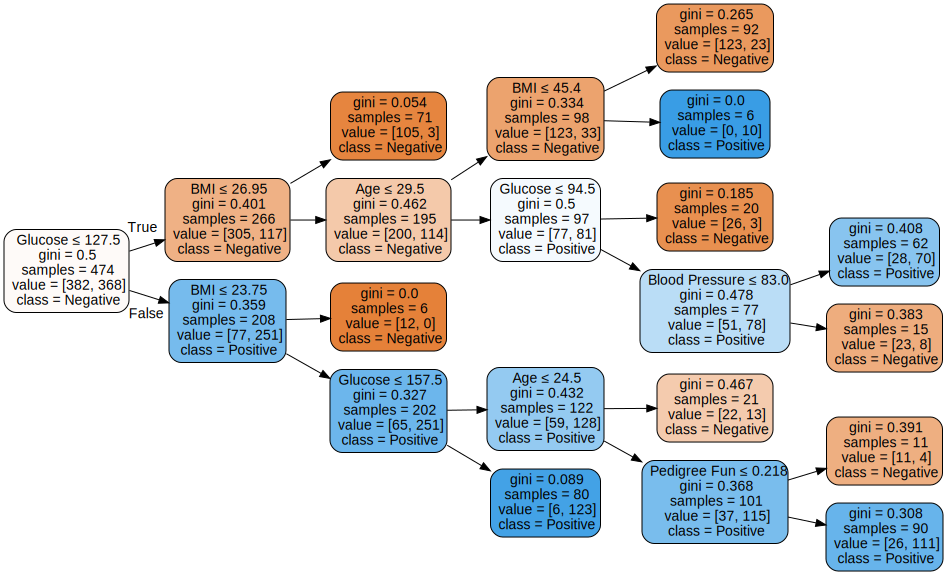

In [337]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Outcome'], axis=1), df['Outcome'], test_size=0.25, random_state=42)

# Train a random forest classifier on the training data
RFC = RandomForestClassifier(n_estimators=100, max_depth=7, criterion='gini', max_features=1.0, random_state=42, ccp_alpha=0.01)
RFC.fit(X_train, y_train)

# Extract feature names from the dataframe
feature_names = X_train.columns

# Export the random forest as a Graphviz dot file
dot_data = export_graphviz(RFC.estimators_[0], out_file=None, feature_names=feature_names,
                           class_names=['Negative', 'Positive'], filled=True, rounded=True,
                           special_characters=True, rotate=True)

# Create a graph from the dot file
graph = graphviz.Source(dot_data)

# Render the graph as a PNG image
graph.format = 'png'
graph.render('random forest', view=False)

# Display the graph
graph


# Artificial Neural Network

In [338]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn import metrics

# # Define different layer sizes
# layer_sizes_list = [(5, 10, 1), (5, 15, 1), (5, 20, 1)]

# # Lists to store results, ROC curves, and box plot data
# results = []
# roc_curves = []

# # Create subplots for ROC curve and box plot
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# # Create variables to store the models
# ANN1 = None
# ANN2 = None
# ANN3 = None

# # Train and evaluate each model
# for i, layer_sizes in enumerate(layer_sizes_list):
#     # Create and train the neural network
#     ANN = MLPClassifier(solver='adam', max_iter=3000, alpha=1e-5, hidden_layer_sizes=layer_sizes, random_state=1)
#     ANN.fit(x_train, y_train)

#     # Store the models
#     if i == 0:
#         ANN1 = ANN
#     elif i == 1:
#         ANN2 = ANN
#     elif i == 2:
#         ANN3 = ANN

#     # Cross-validation
#     cv_results = cross_val_score(ANN, x_test, y_test, cv=5)
#     results.append((layer_sizes, cv_results))

#     # Make predictions on the test set for ROC curve
#     y_pred_test = ANN.predict(x_test)

#     # Calculate ROC curve
#     fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test)
#     auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
#     roc_curves.append((layer_sizes, fpr, tpr, auc))

#     # Plot box plot
#     sns.boxplot(y=cv_results, ax=axes[0])
#     axes[0].set_title('Combined Box Plot')
#     axes[0].set_ylabel('Cross-Validation Accuracy')

#     # Plot ROC curve
#     axes[1].plot(fpr, tpr, label=f'Layer Sizes {layer_sizes} (AUC = {auc})')
#     axes[1].plot([0, 1], [0, 1], 'k--')
#     axes[1].set_title('Combined ROC Curve')
#     axes[1].set_xlabel('False Positive Rate')
#     axes[1].set_ylabel('True Positive Rate')
#     axes[1].legend()

# # Save the models
# import joblib
# joblib.dump(ANN1, 'ANN1_model.pkl')
# joblib.dump(ANN2, 'ANN2_model.pkl')
# joblib.dump(ANN3, 'ANN3_model.pkl')

# # Save the combined plots
# plt.tight_layout()
# plt.savefig('ANN_combined_plots.png')
# plt.show()


In [339]:
# print("\nPerformance Metrics:")
# df_performance

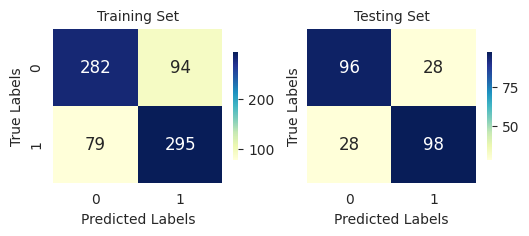

-----Results for ANN2 ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.769333           0.758355         0.78877    0.773263            0.776          0.777778       0.777778   0.777778


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [340]:
#Artificial Neural Network
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='adam', max_iter= 1000, alpha=1e-5,hidden_layer_sizes=(5, 15), random_state=1)
ANN.fit(x_train, y_train)
y_pred_train = ANN.predict(x_train)
y_pred_test  = ANN.predict(x_test)
calculate_confusion("ANN2",y_train, y_pred_train, y_test, y_pred_test)
fpr8, tpr8, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(ANN, x_test, y_test)
results.append(cv_results)

In [341]:
# # Compute False postive rate, and True positive rate
# fpr8, tpr8, thresholds8 = metrics.roc_curve(y_train, ANN2.predict_proba(x_train)[:,1])
# # Calculate Area under the curve to display on the plot
# auc8 = metrics.roc_auc_score(y_train,y_pred_train)

In [342]:
# # Get the training loss values at each iteration
# loss_values = ANN.loss_curve_

# fig = plt.figure(figsize=(5,3))
# # Plot the convergence curve
# plt.plot(loss_values)
# plt.grid(True)
# plt.title('Convergence Curve')
# plt.xlabel('Iteration', fontsize=10)
# plt.ylabel('Training Loss', fontsize=10)
# plt.savefig('ANN_convergence.png')
# plt.show()

# Box Plot

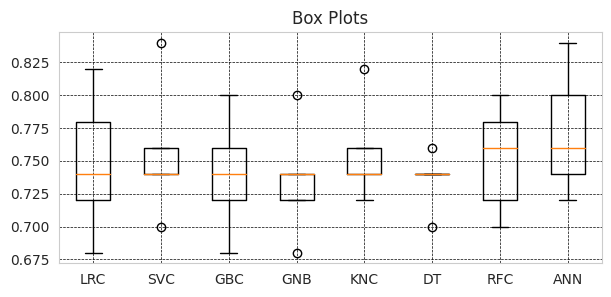

In [343]:
names = ['LRC', 'SVC', 'GBC', 'GNB', 'KNC', 'DT','RFC', 'ANN']

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(7,3))
# Draw the box plots
ax.boxplot(results)
# Set the labels for each box plot
ax.set_xticklabels(names)
# Add a title to the plot
ax.set_title('Box Plots')
plt.grid(color='k', linestyle='--', linewidth=0.5)
# Show the plot
plt.show()

In [344]:
auc1

0.7359198998748436

In [345]:
print(selected_feature_names)

Index(['Pregnancies', 'Glucose', 'BMI', 'Pedigree Fun', 'Age'], dtype='object')


# ROC Curves

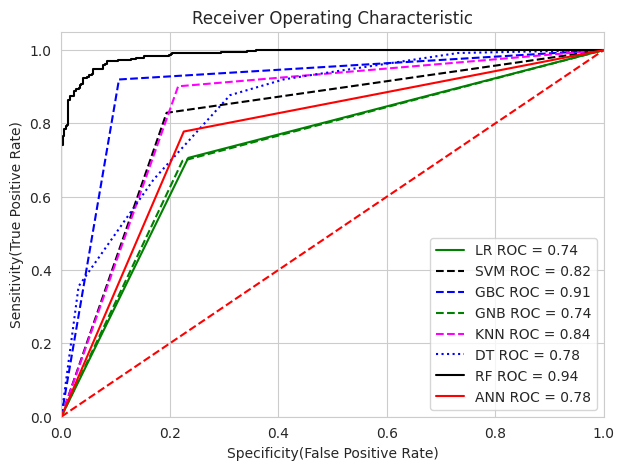

In [346]:
# Now, plot the computed values
fig = plt.figure(figsize=(7,5))

plt.plot(fpr1, tpr1, linestyle='-',color='green', label='LR ROC = %.2f' %auc1)
plt.plot(fpr2, tpr2, linestyle='--',color='black', label='SVM ROC = %.2f' %auc2)
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='GBC ROC = %.2f' %auc3)
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='GNB ROC = %.2f' %auc4)
plt.plot(fpr5, tpr5, linestyle='--',color='magenta', label='KNN ROC = %.2f' %auc5)
plt.plot(fpr6, tpr6, linestyle=':',color='blue', label='DT ROC = %.2f' %auc6)
plt.plot(fpr7, tpr7, linestyle='-',color='black', label='RF ROC = %.2f' %auc7)
plt.plot(fpr8, tpr8,linestyle='-',color='red', label='ANN ROC = %.2f' %auc8)

# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_Curves.png')
plt.show()   # Display